In [1]:
# Importing required libraries
import pandas as pd
from matplotlib import pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score , precision_score , recall_score , confusion_matrix

In [2]:
# Importing required tensorflow functions
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam

In [3]:
# Reading the cleaned dataset into pandas dataframe
data = pd.read_csv("C:/Users/HP/Downloads/ML/DataSets/ccf_cleaned_data.csv")
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# splitting the data to X (input) and Y(output)
X = data.drop('Class',axis= 1)
Y = data['Class']

X = StandardScaler().fit_transform(X)
[X.shape,Y.shape]

[(275663, 29), (275663,)]

In [5]:
# Splitting the data into train set and test set.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size= 0.8, random_state= 4) 
[[ X_train.shape , Y_train.shape ],[ X_test.shape , Y_test.shape ]]

[[(220530, 29), (220530,)], [(55133, 29), (55133,)]]

In [6]:
# Creating the layers of Neural Network.
model = Sequential([
                        tf.keras.Input(shape=(29,)),
                        Dense(units=20,activation='relu'),
                        Dense(units=7,activation='relu'),
                        Dense(units=5,activation='relu'),
                        Dense(units=1,activation='sigmoid'),
])

In [7]:
# Setting the Cost Function and Optimisation method.
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
)

In [8]:
# Fitting the train data to neural network model
model.fit(X_train,Y_train,epochs=24)

Epoch 1/24
6892/6892 [==============================] - 9s 1ms/step - loss: 0.0108
Epoch 2/24
6892/6892 [==============================] - 9s 1ms/step - loss: 0.0035
Epoch 3/24
6892/6892 [==============================] - 8s 1ms/step - loss: 0.0032
Epoch 4/24
6892/6892 [==============================] - 7s 1ms/step - loss: 0.0030
Epoch 5/24
6892/6892 [==============================] - 8s 1ms/step - loss: 0.0028
Epoch 6/24
6892/6892 [==============================] - 8s 1ms/step - loss: 0.0027
Epoch 7/24
6892/6892 [==============================] - 8s 1ms/step - loss: 0.0026
Epoch 8/24
6892/6892 [==============================] - 7s 1ms/step - loss: 0.0025
Epoch 9/24
6892/6892 [==============================] - 8s 1ms/step - loss: 0.0024
Epoch 10/24
6892/6892 [==============================] - 8s 1ms/step - loss: 0.0025
Epoch 11/24
6892/6892 [==============================] - 8s 1ms/step - loss: 0.0024
Epoch 12/24
6892/6892 [==============================] - 8s 1ms/step - loss: 0.0023
E

In [9]:
# Getting the output values for the test data
y_ = model.predict(X_test)

1723/1723 [==============================] - 2s 970us/step


In [10]:
# Converting the output data to 1 and 0 based on threshold of 0.5
y = tf.round(y_)

In [11]:
precision_score(Y_test , y , average = 'macro')

0.9146455585925566

In [12]:
recall_score(Y_test , y , average = 'macro')

0.9194039802029734

In [13]:
f1_score(Y_test , y , average = 'macro')

0.9170111479204865

Text(0.5, 62.15999999999998, 'Predicted transaction')

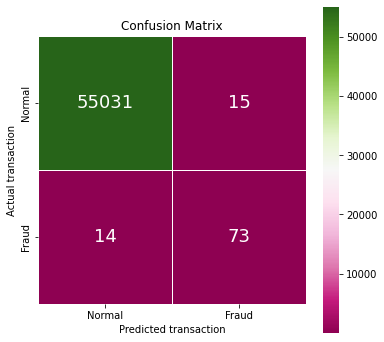

In [17]:
plt.figure(figsize=(6,6))
data = confusion_matrix(Y_test,y) 
l = ['Normal','Fraud']
sns.heatmap(data,annot= True,annot_kws= {'size':18},fmt= 'd',linewidths= .5,cmap= 'PiYG',square= True,xticklabels= l ,yticklabels= l)
plt.title('Confusion Matrix')
plt.ylabel('Actual transaction')
plt.xlabel('Predicted transaction')